# When Does Linear Regression Fail 
## Experiment 1 :Faliure on Non-Linear Data

### Research Question 
What happens when the true relationship between features and targets is non linear ,but we apply linear regression?

In this experiment , we compare the performance of linear regression and polynomial regression models on:
- A linear dataset
- A quadratic Dataset

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("default")


In [8]:
df = pd.read_csv("../results/exp1_results.csv")
df


,data,model,mse
0,linear,Linear,0.806585
1,linear,Poly2,0.777194
2,linear,Poly3,0.772465
3,quadratic,Linear,57.741466
4,quadratic,Poly2,0.777194
5,quadratic,Poly3,0.772465


### Quantitative Results (MSE)

We first examine the mean squared error (MSE) across different models and datasets to understand overall performance trends.


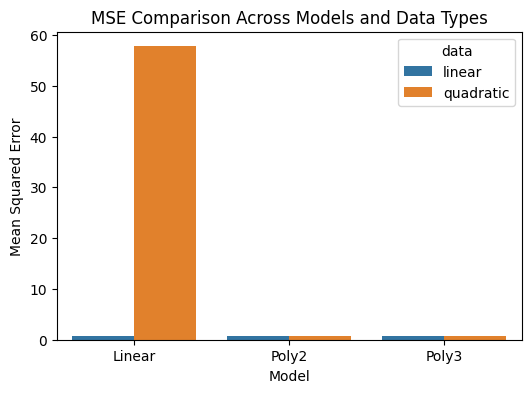

In [20]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.barplot(data=df, x="model", y="mse", hue="data")
plt.title("MSE Comparison Across Models and Data Types")
plt.ylabel("Mean Squared Error")
plt.xlabel("Model")
plt.savefig("plots/exp1_mse.png", dpi=300, bbox_inches="tight")

plt.show()


### Interpretation

On linear data, linear regression achieves low error, as expected, since its assumptions are satisfied.

However, on quadratic data, linear regression exhibits significantly higher error, indicating underfitting. Polynomial regression reduces this error by introducing non-linear feature transformations, at the cost of increased model complexity.


In [21]:
from src.data_generation import generate_quadratic
from src.models import linear_model, polynomial_model

X, y = generate_quadratic(seed=42)

models = {
    "Linear Regression": linear_model(),
    "Polynomial Regression (Degree 2)": polynomial_model(2)
}


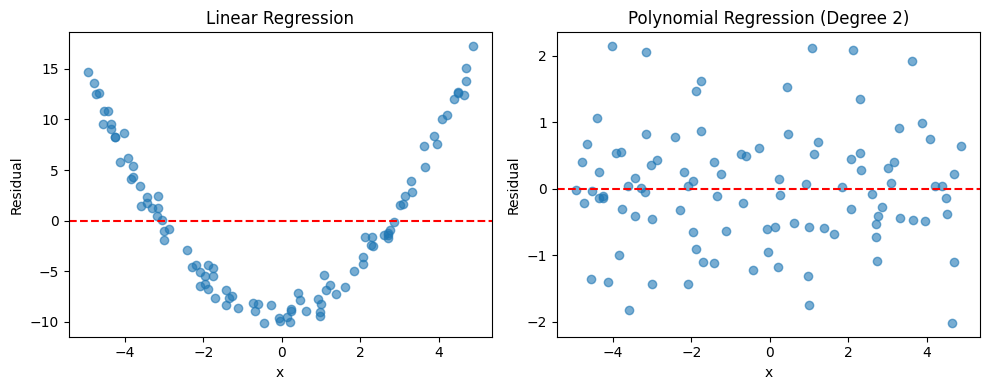

In [22]:
plt.figure(figsize=(10,4))

for i, (name, model) in enumerate(models.items(), 1):
    model.fit(X, y)
    preds = model.predict(X)
    residuals = y - preds
    
    plt.subplot(1, 2, i)
    plt.scatter(X, residuals, alpha=0.6)
    plt.axhline(0, color="red", linestyle="--")
    plt.title(name)
    plt.xlabel("x")
    plt.ylabel("Residual")

plt.tight_layout()
plt.savefig("plots/exp1_residuals.png", dpi=300, bbox_inches="tight")

plt.show()


### Residual Analysis

The residual plot for linear regression on quadratic data shows a clear curved pattern. This indicates a systematic structure in the errors, violating the linearity assumption.

In contrast, polynomial regression produces residuals that are more randomly scattered around zero, suggesting that the model better captures the underlying relationship.


### Key Takeaway

Linear regression fails on non-linear data not merely due to higher error, but because its assumptions are violated. Residual analysis provides a diagnostic tool to identify such failures, even when error metrics alone may be misleading.


In [19]:
pwd

'C:\\Users\\anil5\\OneDrive\\Desktop\\coding\\c++\\why_regression_fails_project'